In [10]:
! pip install Arbie

In [2]:
from Arbie.Actions.amm import Amm, Token, Variable

In [3]:
size = 100

# Setup tokens
dai = Token('dai')
eth = Token('eth')

# Setup weights
b = [Variable(dai,400*size), Variable(eth,1*size)]
w = [Variable(dai, 0.5), Variable(eth, 0.5)]

pool1 = Amm(b,w, 0.003)
pool1.spot_price(dai, eth)


400.0

In [4]:
# Setup weights
b = [Variable(dai,410*size), Variable(eth,1*size)]
w = [Variable(dai, 0.5), Variable(eth, 0.5)]

pool2 = Amm(b,w, 0.005)
pool2.spot_price(dai, eth)

410.0

In [5]:
# We can see that pool2 has a higher price for eth then pool1. If we have dai we can buy eth from pool1 and sell to pool2
# The only question is how much should we buy and sell?

In [6]:
def arbitrage(pool_low, pool_high, amount):
    eth_amount = pool1.out_given_in(dai, eth, amount)
    #print("ETH {0} bought".format(eth_amount))
    dai_amount = pool2.out_given_in(eth, dai, eth_amount)
    #print("Dai {0} bought".format(dai_amount))
    return dai_amount-amount
    

In [7]:
amount = 2250

profit = arbitrage(pool1, pool2, amount)

print("We made {0} profit".format((profit)))

We made -192.37661833917173 profit


In [8]:
%matplotlib inline

Text(0.5,1,'Profit graph')

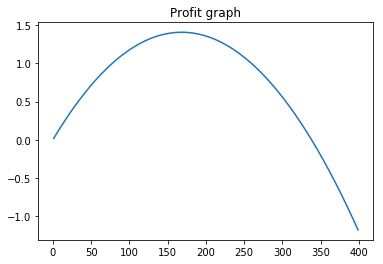

In [9]:
import matplotlib.pyplot as plt
y =[]
x = range(1,400,1)
for amount in x:
    y.append(arbitrage(pool1, pool2, amount))
    
plt.plot(x, y)
plt.title('Profit graph')

In [11]:
from Arbie.Actions.arbitrage import Arbitrage

SyntaxError: invalid syntax (arbitrage.py, line 9)